<a href="https://colab.research.google.com/github/AnovaYoung/Natural-Language-Processing/blob/main/NLP%2C_NER_and_POS_Tagging_with_Sentiment_and_Entity_Specific_Analysis%2C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP, NER and POS TAGGING

The goal of this assignment is to apply Natural Language Processing (NLP), Named Entity Recognition (NER), and Part-of-Speech (POS) techniques in NLP to analyze the Climate Fever dataset. The dataset contains climate change-related articles, and I will be extracting named entities and assigning POS tags to different parts of speech in the text.

In [3]:
import pandas as pd

dataset_path = '/content/climate-fever.csv'
df = pd.read_csv(dataset_path)

df.head()


,claim_id,claim,claim_label,evidences/0/evidence_id,evidences/0/evidence_label,evidences/0/article,evidences/0/evidence,evidences/0/entropy,evidences/0/votes/0,evidences/0/votes/1,...,evidences/4/evidence_id,evidences/4/evidence_label,evidences/4/article,evidences/4/evidence,evidences/4/entropy,evidences/4/votes/0,evidences/4/votes/1,evidences/4/votes/2,evidences/4/votes/3,evidences/4/votes/4
0,0,Global warming is driving polar bears toward e...,SUPPORTS,Extinction risk from global warming:170,NOT_ENOUGH_INFO,Extinction risk from global warming,"""Recent Research Shows Human Activity Driving ...",0.693147,SUPPORTS,NOT_ENOUGH_INFO,...,Polar bear:1328,NOT_ENOUGH_INFO,Polar bear,"""Bear hunting caught in global warming debate"".",0.693147,SUPPORTS,NOT_ENOUGH_INFO,NaN,NaN,NaN
1,5,The sun has gone into ‘lockdown’ which could c...,SUPPORTS,Famine:386,SUPPORTS,Famine,The current consensus of the scientific commun...,0.000000,SUPPORTS,SUPPORTS,...,Winter:5,NOT_ENOUGH_INFO,Winter,"In many regions, winter is associated with sno...",0.693147,REFUTES,NOT_ENOUGH_INFO,NaN,NaN,NaN
2,6,The polar bear population has been growing.,REFUTES,Polar bear:1332,NOT_ENOUGH_INFO,Polar bear,"""Ask the experts: Are polar bear populations i...",0.693147,NOT_ENOUGH_INFO,REFUTES,...,Polar bear:61,REFUTES,Polar bear,Of the 19 recognized polar bear subpopulations...,0.000000,REFUTES,REFUTES,NaN,NaN,NaN
3,9,Ironic' study finds more CO2 has slightly cool...,REFUTES,Atmosphere of Mars:131,NOT_ENOUGH_INFO,Atmosphere of Mars,CO2 in the mesosphere acts as a cooling agent ...,0.693147,NOT_ENOUGH_INFO,SUPPORTS,...,Carbon dioxide:191,NOT_ENOUGH_INFO,Carbon dioxide,"Less energy reaches the upper atmosphere, whic...",0.000000,NOT_ENOUGH_INFO,NOT_ENOUGH_INFO,NaN,NaN,NaN
4,10,Human additions of CO2 are in the margin of er...,REFUTES,Carbon dioxide in Earth's atmosphere:140,NOT_ENOUGH_INFO,Carbon dioxide in Earth's atmosphere,While CO 2 absorption and release is always ha...,0.693147,NOT_ENOUGH_INFO,REFUTES,...,Sea:226,REFUTES,Sea,"More recently, anthropogenic activities have s...",0.000000,REFUTES,REFUTES,NaN,NaN,NaN


**PrePreprocessing**

**Clean Text**: Remove unnecessary characters (special symbols, digits), lowercase the text, and tokenize it.

**Preprocess Multiple Evidence Columns:** Since there are multiple evidence columns (evidences/0/evidence, evidences/1/evidence, . . .), I'll apply the same preprocessing steps to each.



In [4]:
import re
import spacy

# This is spaCy English model
nlp = spacy.load("en_core_web_sm")

# Text preprocessing code
def preprocess_text(text):
    if pd.isna(text):
        return ""
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Goodye digits
    text = re.sub(r'\d+', '', text)

    # Convert to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the 'claim' column
df['cleaned_claim'] = df['claim'].apply(preprocess_text)

# Preprocess all evidence columns (from evidences/0 to evidences/4)
for i in range(5):
    evidence_column = f'evidences/{i}/evidence'
    if evidence_column in df.columns:
        df[f'cleaned_evidence_{i}'] = df[evidence_column].apply(preprocess_text)

# Preview df
df[['cleaned_claim', 'cleaned_evidence_0', 'cleaned_evidence_1']].head()


,cleaned_claim,cleaned_evidence_0,cleaned_evidence_1
0,global warming is driving polar bears toward e...,recent research shows human activity driving e...,environmental impacts include the extinction o...
1,the sun has gone into lockdown which could cau...,the current consensus of the scientific commun...,the little ice age caused crop failures and fa...
2,the polar bear population has been growing,ask the experts are polar bear populations inc...,the growth of the human population in the eura...
3,ironic study finds more co has slightly cooled...,co in the mesosphere acts as a cooling agent b...,the higher concentration of co in the martian ...
4,human additions of co are in the margin of err...,while co absorption and release is always hap...,the burning of longburied fossil fuels release...


# Named Entity Recognition (NER)

Extract named entities using spaCy's built-in NER capabilities:

**Code walkthrough:**

**extract_entities function:** This function uses spaCy to extract named entities from the text and returns them as a list of tuples (entity text, entity type).

**NER on claims:** The function is applied to the cleaned_claim column.

**NER on evidences:** The function is applied to each of the cleaned_evidence_* columns.

In [6]:
def extract_entities(text):
    if not text:  # In case text is empty
        return []
    doc = nlp(text)

    # Extract entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply NER to the cleaned claim column
df['claim_entities'] = df['cleaned_claim'].apply(extract_entities)

# Apply NER to all cleaned evidence columns
for i in range(5):
    evidence_column = f'cleaned_evidence_{i}'
    if evidence_column in df.columns:
        df[f'evidence_entities_{i}'] = df[evidence_column].apply(extract_entities)

# Preview results
df[['cleaned_claim', 'claim_entities', 'cleaned_evidence_0', 'evidence_entities_0']].head()


,cleaned_claim,claim_entities,cleaned_evidence_0,evidence_entities_0
0,global warming is driving polar bears toward e...,[],recent research shows human activity driving e...,[]
1,the sun has gone into lockdown which could cau...,[],the current consensus of the scientific commun...,[]
2,the polar bear population has been growing,[],ask the experts are polar bear populations inc...,[]
3,ironic study finds more co has slightly cooled...,[],co in the mesosphere acts as a cooling agent b...,[]
4,human additions of co are in the margin of err...,[],while co absorption and release is always hap...,[]


# POS Tagging:

I’ll perform POS tagging on the cleaned_claim and cleaned_evidence columns using spaCy again.

In [7]:
def pos_tagging(text):
    if not text:
        return []
    doc = nlp(text)
    # Extract tokens and their POS tags as (token text, POS)
    pos_tags = [(token.text, token.pos_) for token in doc]
    return pos_tags

# Apply POS tagging to the cleaned claim column
df['claim_pos_tags'] = df['cleaned_claim'].apply(pos_tagging)

# Now to all cleaned evidence columns
for i in range(5):
    evidence_column = f'cleaned_evidence_{i}'
    if evidence_column in df.columns:
        df[f'evidence_pos_tags_{i}'] = df[evidence_column].apply(pos_tagging)

df[['cleaned_claim', 'claim_pos_tags', 'cleaned_evidence_0', 'evidence_pos_tags_0']].head()


,cleaned_claim,claim_pos_tags,cleaned_evidence_0,evidence_pos_tags_0
0,global warming is driving polar bears toward e...,"[(global, ADJ), (warming, NOUN), (is, AUX), (d...",recent research shows human activity driving e...,"[(recent, ADJ), (research, NOUN), (shows, VERB..."
1,the sun has gone into lockdown which could cau...,"[(the, DET), (sun, NOUN), (has, AUX), (gone, V...",the current consensus of the scientific commun...,"[(the, DET), (current, ADJ), (consensus, NOUN)..."
2,the polar bear population has been growing,"[(the, DET), (polar, ADJ), (bear, NOUN), (popu...",ask the experts are polar bear populations inc...,"[(ask, VERB), (the, DET), (experts, NOUN), (ar..."
3,ironic study finds more co has slightly cooled...,"[(ironic, ADJ), (study, NOUN), (finds, VERB), ...",co in the mesosphere acts as a cooling agent b...,"[(co, PROPN), (in, ADP), (the, DET), (mesosphe..."
4,human additions of co are in the margin of err...,"[(human, ADJ), (additions, NOUN), (of, ADP), (...",while co absorption and release is always hap...,"[(while, SCONJ), (co, NOUN), ( , SPACE), (abso..."


# Visualization:

Next, I'll visualize the most common named entities and parts of speech across the dataset.

Here's what I'll do:

**Entity Frequency:** Count the frequency of each entity label.

**POS Tag Frequency:** Count the frequency of each POS tag.


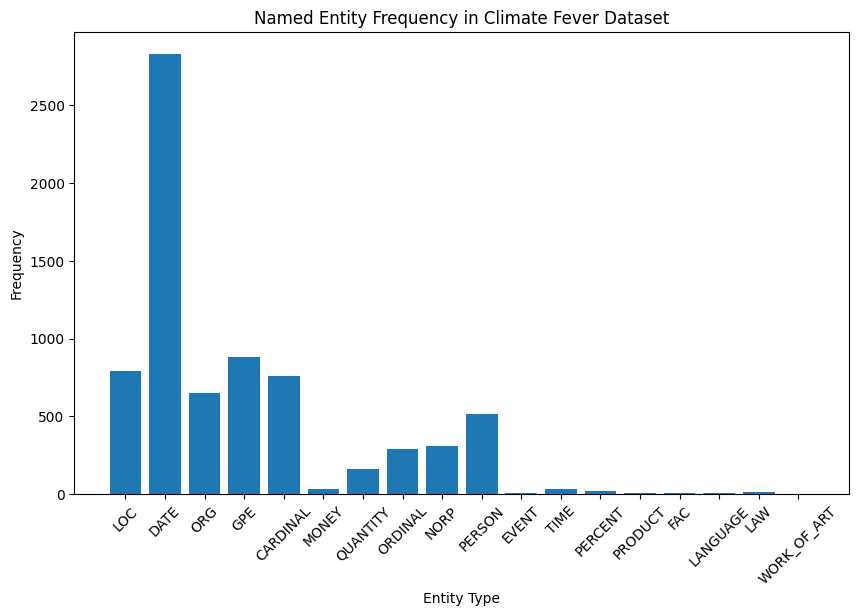

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Collect all entities from claims and evidence
all_entities = []
for i in range(5):
    if f'evidence_entities_{i}' in df.columns:
        all_entities += [entity for entities in df[f'evidence_entities_{i}'] for entity in entities]
all_entities += [entity for entities in df['claim_entities'] for entity in entities]

# Extract only the entity labels ('PERSON', 'ORG', etc.)
entity_labels = [ent[1] for ent in all_entities]

# Count the frequency of each entity label
entity_freq = Counter(entity_labels)

# Plot entity frequency
plt.figure(figsize=(10, 6))
plt.bar(entity_freq.keys(), entity_freq.values())
plt.title("Named Entity Frequency in Climate Fever Dataset")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


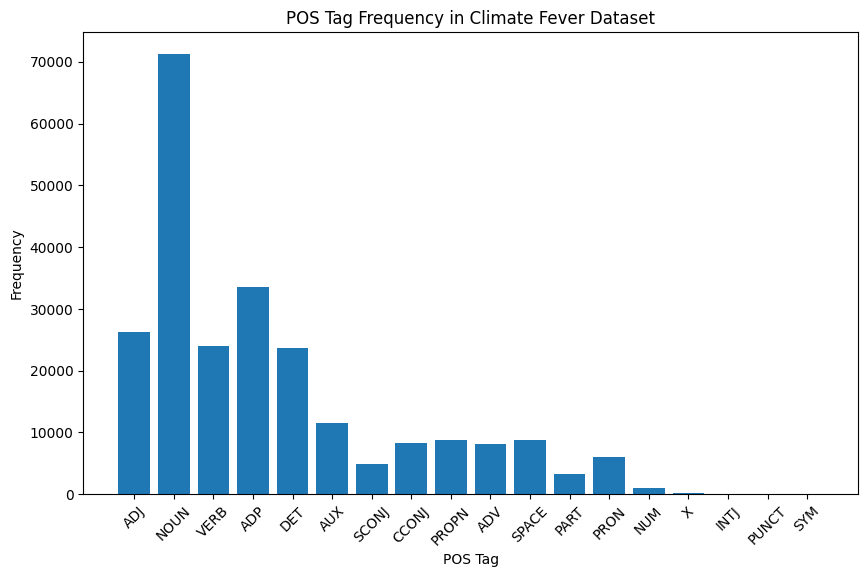

In [9]:
# Collect all POS tags from claims and evidence
all_pos_tags = []
for i in range(5):
    if f'evidence_pos_tags_{i}' in df.columns:
        all_pos_tags += [tag for tags in df[f'evidence_pos_tags_{i}'] for tag in tags]
all_pos_tags += [tag for tags in df['claim_pos_tags'] for tag in tags]

# Extract only the POS tag labels ('NOUN', 'VERB', etc.)
pos_labels = [pos[1] for pos in all_pos_tags]

# Count the frequency, same as NER
pos_freq = Counter(pos_labels)

# Plot POS
plt.figure(figsize=(10, 6))
plt.bar(pos_freq.keys(), pos_freq.values())
plt.title("POS Tag Frequency in Climate Fever Dataset")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


### Named Entity Recognition (NER) Insights:
- **DATE** is the most frequent named entity, likely due to the prevalence of climate-related events and projections that often include dates.
- **ORG**, **GPE** (Geopolitical Entities like countries or cities), and **LOC** (locations) are also common, which makes sense for a dataset discussing global climate change and the organizations and locations involved in the discourse.
- **PERSON** entities are less frequent, but they still appear regularly, likely referencing individuals involved in climate science or policymaking.

### POS Tagging Insights:
- **NOUN** is by far the most frequent part of speech, which is definetly expected as many claims and evidences in climate-related texts contain references to subjects like "climate," "temperature," "policy," etc.
- **VERB** and **ADP** (adpositions like prepositions) are also relatively common, verbs drive the action in the claims, and adpositions link actions to subjects or objects. Frequency is expected per laws of syntax.
- **ADJ** (adjectives) are common as well, likely because many climate claims involve descriptive language to emphasize the severity of the issue

### Next Steps:

Outside the scope of the assignment, I will now dive into Entity-Specific Analysis, POS Tag Analysis by Entity, Sentiment Analysis, Top Verbs in SUPPORTS vs. REFUTES, and Co-occurrence of Entities.

# Entity-Specific Analysis:

I will analyze the frequency of specific entities, such as ORG (organizations), LOC (locations), and GPE (geopolitical entities). This will give me insight into which organizations, locations, or geopolitical entities are most frequently mentioned in the dataset.

In [10]:
from collections import Counter

# Code to pull entities of a specific type
def extract_specific_entities(entities, entity_type):
    return [ent[0] for ent in entities if ent[1] == entity_type]

# Collect all ORG, LOC, and GPE entities from claims and evidences
org_entities = []
loc_entities = []
gpe_entities = []

for i in range(5):
    if f'evidence_entities_{i}' in df.columns:
        org_entities += [ent for entities in df[f'evidence_entities_{i}'] for ent in extract_specific_entities(entities, 'ORG')]
        loc_entities += [ent for entities in df[f'evidence_entities_{i}'] for ent in extract_specific_entities(entities, 'LOC')]
        gpe_entities += [ent for entities in df[f'evidence_entities_{i}'] for ent in extract_specific_entities(entities, 'GPE')]

# Also extract from the claim entities
org_entities += [ent for entities in df['claim_entities'] for ent in extract_specific_entities(entities, 'ORG')]
loc_entities += [ent for entities in df['claim_entities'] for ent in extract_specific_entities(entities, 'LOC')]
gpe_entities += [ent for entities in df['claim_entities'] for ent in extract_specific_entities(entities, 'GPE')]

# Count the most frequent ORG, LOC, and GPE entities
org_counter = Counter(org_entities)
loc_counter = Counter(loc_entities)
gpe_counter = Counter(gpe_entities)

# Display the top 10 most frequent entities
print("Top 10 Organizations (ORG):", org_counter.most_common(10))
print("Top 10 Locations (LOC):", loc_counter.most_common(10))
print("Top 10 Geopolitical Entities (GPE):", gpe_counter.most_common(10))


Top 10 Organizations (ORG): [('nasa', 46), ('un', 31), ('continental', 20), ('epa', 20), ('el niño', 17), ('the new york times', 11), ('the united nations environment programme', 11), ('senate', 10), ('the united nations', 9), ('congress', 8)]
Top 10 Locations (LOC): [('arctic', 247), ('arctic sea', 58), ('earth', 45), ('europe', 41), ('pacific', 30), ('atlantic', 29), ('north america', 24), ('north atlantic', 20), ('the arctic sea', 16), ('gulf', 15)]
Top 10 Geopolitical Entities (GPE): [('the united states', 100), ('us', 65), ('paris', 62), ('australia', 43), ('california', 35), ('canada', 26), ('china', 26), ('florida', 24), ('india', 18), ('mexico', 18)]


**Organizations (ORG)**: NASA and the UN are the most frequently mentioned organizations, likely due to their involvement in global climate monitoring and policy. Entities like the EPA and Congress suggest a focus on US-based policies.

**Locations (LOC):** The Arctic is by far the most frequent location, this is very interesting as it suggests discussions around polar ice melting and climate change effects in this region. Other geographical entities like the Atlantic and Pacific oceans are also frequently mentioned.

**Geopolitical Entities (GPE):** The United States is the most common geopolitical entity, with Paris (likely linked to the Paris Climate Agreement) and countries like Australia and China also frequently mentioned.

# POS Tag Analysis by Entity:
I will now analyze which parts of speech are associated with specific entity types, such as ORG and GPE.

In [11]:
def extract_pos_by_entity(text, entity_type):
    doc = nlp(text)
    pos_tags = []
    for ent in doc.ents:
        if ent.label_ == entity_type:
            # Get surrounding tokens (within window of 2 tokens before/after)
            start = max(ent.start - 2, 0)
            end = min(ent.end + 2, len(doc))
            pos_tags += [(token.text, token.pos_) for token in doc[start:end]]
    return pos_tags

# POS tagging around ORG entities
df['org_pos_tags'] = df['cleaned_claim'].apply(lambda text: extract_pos_by_entity(text, 'ORG'))
df['gpe_pos_tags'] = df['cleaned_claim'].apply(lambda text: extract_pos_by_entity(text, 'GPE'))

# Collect POS tags for ORG and GPE, all entities
all_org_pos_tags = []
all_gpe_pos_tags = []

for i in range(5):
    evidence_column = f'cleaned_evidence_{i}'
    if evidence_column in df.columns:
        all_org_pos_tags += df[evidence_column].apply(lambda text: extract_pos_by_entity(text, 'ORG')).sum()
        all_gpe_pos_tags += df[evidence_column].apply(lambda text: extract_pos_by_entity(text, 'GPE')).sum()

all_org_pos_tags += df['org_pos_tags'].sum()
all_gpe_pos_tags += df['gpe_pos_tags'].sum()

# Count the POS tags associated with ORG and GPE entities
org_pos_counter = Counter([pos for _, pos in all_org_pos_tags])
gpe_pos_counter = Counter([pos for _, pos in all_gpe_pos_tags])

print("Top POS tags around ORG entities:", org_pos_counter.most_common(10))
print("Top POS tags around GPE entities:", gpe_pos_counter.most_common(10))


Top POS tags around ORG entities: [('PROPN', 1157), ('NOUN', 719), ('ADP', 457), ('DET', 390), ('VERB', 362), ('ADJ', 199), ('CCONJ', 120), ('SPACE', 120), ('AUX', 90), ('SCONJ', 62)]
Top POS tags around GPE entities: [('PROPN', 1464), ('ADP', 675), ('NOUN', 619), ('DET', 427), ('VERB', 327), ('CCONJ', 233), ('AUX', 164), ('ADJ', 144), ('SPACE', 102), ('ADV', 83)]


**ORG Entities:** The dominant POS tags around organizations are PROPN (proper nouns), NOUN, and ADP (prepositions), reflecting that organizations are typically being referred to in conjunction with actions or nouns. So an organization is *doing* something.

**GPE Entities:** Similar to ORG entities, PROPN and ADP are prevalent, with VERB and NOUN tags highlighting frequent discussions around the actions or policies associated with these geopolitical entities.

# Sentiment Analysis:

I'll use a pre-trained model from TextBlob for sentiment analysis on the claims.

(-1.003, -0.6]      10
(-0.6, -0.2]        80
(-0.2, 0.2]       1207
(0.2, 0.6]         226
(0.6, 1.0]          12
Name: count, dtype: int64


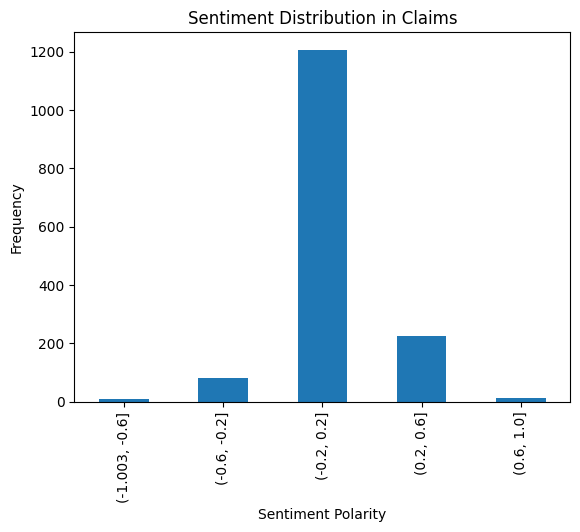

In [12]:
from textblob import TextBlob

# Function to get sentiment polarity (-1: negative, 0: neutral, +1: positive)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the cleaned claims
df['claim_sentiment'] = df['cleaned_claim'].apply(get_sentiment)

# Analyze sentiment distribution
sentiment_counts = df['claim_sentiment'].value_counts(bins=5, sort=False)
print(sentiment_counts)

# Plot distribution
sentiment_counts.plot(kind='bar', title='Sentiment Distribution in Claims')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


The majority of the claims have a neutral sentiment, with polarity values between (-0.2, 0.2).

There is a relatively small number of claims that express either strongly positive or strongly negative sentiment, as seen by the low counts in the extreme polarity ranges.

# Top Verbs in SUPPORTS vs. REFUTES:

I'll extract and compare the most frequent verbs used in claims that SUPPORT vs. REFUTE climate claims.


In [13]:
# Extract verbs from the POS tags for claims with 'SUPPORTS' and 'REFUTES' labels
def extract_verbs(pos_tags):
    return [token[0] for token in pos_tags if token[1] == 'VERB']

# Apply verb extraction
df['verbs'] = df['claim_pos_tags'].apply(extract_verbs)

# Get the most common verbs for SUPPORTS and REFUTES
supports_verbs = df[df['claim_label'] == 'SUPPORTS']['verbs'].sum()
refutes_verbs = df[df['claim_label'] == 'REFUTES']['verbs'].sum()

supports_verb_counter = Counter(supports_verbs)
refutes_verb_counter = Counter(refutes_verbs)

print("Top 10 Verbs in SUPPORTS Claims:", supports_verb_counter.most_common(10))
print("Top 10 Verbs in REFUTES Claims:", refutes_verb_counter.most_common(10))


Top 10 Verbs in SUPPORTS Claims: [('rising', 21), ('warming', 21), ('said', 20), ('increasing', 18), ('cooling', 17), ('show', 17), ('increased', 13), ('caused', 13), ('make', 12), ('causing', 12)]
Top 10 Verbs in REFUTES Claims: [('increasing', 10), ('according', 9), ('is', 9), ('rising', 8), ('published', 8), ('caused', 7), ('s', 7), ('predicted', 7), ('have', 7), ('suggests', 6)]


**SUPPORTS Claims:** Common verbs like "rising", "warming", and "increasing" suggest discussions about climate change effects, especially temperature changes and their escalation.

**REFUTES Claims:** Verbs like "predicted", "published", and "suggests" indicate a focus on questioning the validity of data or forecasts, as well as citing opposing studies.

# Co-occurrence of Entities:

I'll analyze which entities co-occur frequently within the same claim or evidence.

In [14]:
from itertools import combinations

# Function to find entity co-occurrences
def get_entity_combinations(entities):
    entity_texts = [ent[0] for ent in entities]
    return list(combinations(entity_texts, 2))

# Apply co-occurrence analysis to claims and evidences
df['claim_entity_combinations'] = df['claim_entities'].apply(get_entity_combinations)

for i in range(5):
    evidence_column = f'evidence_entities_{i}'
    if evidence_column in df.columns:
        df[f'evidence_entity_combinations_{i}'] = df[evidence_column].apply(get_entity_combinations)

# Collect all co-occurrences
all_entity_combinations = df['claim_entity_combinations'].sum()
for i in range(5):
    if f'evidence_entity_combinations_{i}' in df.columns:
        all_entity_combinations += df[f'evidence_entity_combinations_{i}'].sum()

# Count the co-occurrence frequency
entity_combination_counter = Counter(all_entity_combinations)

# Display the top 10 co-occurring entities
print("Top 10 Co-occurring Entities:", entity_combination_counter.most_common(10))


Top 10 Co-occurring Entities: [(('arctic', 'arctic'), 24), (('arctic', 'anomaly'), 24), (('earths', 'continental'), 20), (('approximately  percent', 'million'), 16), (('the th century', 'the last  years'), 13), (('english', 'english'), 13), (('million', 'million'), 12), (('american', 'english'), 10), (('english', 'one'), 10), (('approximately  billion tonnes', 'each year'), 10)]


Frequent co-occurrences such as "arctic" with "anomaly" highlight a common discussion around anomalies in the Arctic climate.

Other co-occurrences like "approximately percent" and "million" suggest many claims are quantitative, discussing percentages, large-scale measurements, it suggests measurable climate impacts.